In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pickle
import pandas as pd

import torch
import torch.nn as nn
import torch.optim as optim
import pickle
from torch.nn.functional import pad, one_hot

from torch.utils.data import DataLoader
from matplotlib import pyplot as plt

import Transformer
from Transformer import TransformerClassifier, MyDataset, create_padding_mask

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


Create DataLoader

In [3]:
# # Import Data
# name = "Train_Data_m"
# with open(name,"rb") as file:
#     raw_data = pickle.load(file)


# # Pad Data
# data = raw_data["System_EWS"]
# seq = [torch.from_numpy(run) for run in data]
# #seq_trun = [torch.from_numpy(run[:,:6]).float() for run in data]

# seq_padded = []
# max_length = 650
# for run in seq:
#     pad_amount = max_length - run.shape[0]
#     run_padded = pad(run, (0, 0, pad_amount, 0))
#     seq_padded.append(run_padded)
# input_data = torch.stack(seq_padded)

# # Create one-hot labels
# labels = [torch.tensor(label) for label in raw_data["null"]]
# labels_t = torch.stack(labels)
# labels_oh = one_hot(labels_t)


# dataset = MyDataset(input_data, labels_oh)
# batch_size = 50
# dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

In [4]:
train_data = torch.load("Train_Data")
train_classes = torch.load("Train_Classes")

C:\Users\ebadi\AppData\Local\Temp\ipykernel_3400\3484752107.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  train_data = torch.load("Train_Data")
C:\Users\ebadi\AppData\

In [5]:
dataset = MyDataset(train_data, train_classes)
batch_size = 100
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

Initialize Model and Select Parameters

In [6]:
dim_feedforward = 12
input_dim = 12  # Number of features
d_model = 32  # Transformer model dimension
num_heads = 4   # Number of attention heads
num_layers = 4  # Number of transformer layers
#num_classes = 2  # Number of classes for classification
dropout = 0.1   # Dropout rate

model = TransformerClassifier(input_dim, d_model, num_heads, num_layers, dim_feedforward, dropout)
model = model.to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.BCEWithLogitsLoss()

Train Model

In [7]:
epochs = 50 # number of epochs

losses = []

for epoch in range(1,epochs+1):
    i = 0
    for batch_data, batch_labels in dataloader:
        batch_data = batch_data.to(device)
        batch_labels = batch_labels.to(device)
        output = model(batch_data)
        loss = criterion(output, batch_labels)
        if i%10 == 0:
            print(f"Loss: {loss.item()}")
        i+= 1 
        losses.append(loss.item())
        optimizer.zero_grad()
        
        loss.backward()
        optimizer.step()


d:\Anaconda\envs\x\lib\site-packages\torch\nn\functional.py:5560: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:555.)
  attn_output = scaled_dot_product_attention(q, k, v, attn_mask, dropout_p, is_causal)


Loss: 0.9430294632911682
Loss: 0.5323666930198669
Loss: 0.49757909774780273
Loss: 0.4750290513038635
Loss: 0.45955604314804077
Loss: 0.4419759213924408
Loss: 0.4201810359954834
Loss: 0.4461413621902466
Loss: 0.4246748387813568
Loss: 0.4598737359046936
Loss: 0.4202233850955963
Loss: 0.43348953127861023
Loss: 0.4238339960575104
Loss: 0.3675243556499481
Loss: 0.3519495725631714
Loss: 0.37498122453689575
Loss: 0.30513995885849
Loss: 0.25858935713768005
Loss: 0.29189836978912354
Loss: 0.2791365087032318
Loss: 0.12295442074537277
Loss: 0.2845090329647064
Loss: 0.2143193632364273
Loss: 0.2071993350982666
Loss: 0.2645677924156189
Loss: 0.20495793223381042
Loss: 0.21654725074768066
Loss: 0.26358386874198914
Loss: 0.08631114661693573
Loss: 0.19629055261611938
Loss: 0.2605488896369934
Loss: 0.14999835193157196
Loss: 0.13474194705486298
Loss: 0.17027337849140167
Loss: 0.28051111102104187
Loss: 0.1503436416387558
Loss: 0.1874399185180664
Loss: 0.1781732141971588
Loss: 0.1740536093711853
Loss: 0.171

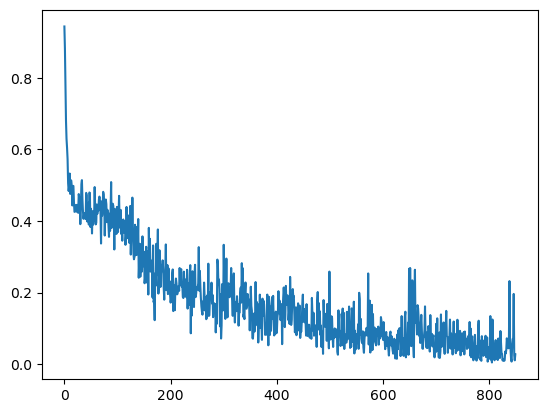

In [8]:
plt.plot(losses);

In [9]:
#torch.save(model, "model_1700k12.pth")

Test Model

In [10]:
# model2 = torch.load("model.pth")
# model2.eval()

In [11]:
model.eval()

TransformerClassifier(
  (projection): Linear(in_features=12, out_features=32, bias=True)
  (pos_encoder): PositionalEncoding(
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (transformer_encoder): TransformerEncoder(
    (layers): ModuleList(
      (0-3): 4 x TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=32, out_features=32, bias=True)
        )
        (linear1): Linear(in_features=32, out_features=12, bias=True)
        (dropout): Dropout(p=0.1, inplace=False)
        (linear2): Linear(in_features=12, out_features=32, bias=True)
        (norm1): LayerNorm((32,), eps=1e-05, elementwise_affine=True)
        (norm2): LayerNorm((32,), eps=1e-05, elementwise_affine=True)
        (dropout1): Dropout(p=0.1, inplace=False)
        (dropout2): Dropout(p=0.1, inplace=False)
      )
    )
  )
  (classification_head): Linear(in_features=32, out_features=1, bias=True)
)

In [12]:
# with torch.no_grad():
#     for batch_data, batch_labels in dataloader:
#         batch_data = batch_data.to(device)
#         batch_labels = batch_labels.to(device)
#         output = model(batch_data)
#         output = output.to(device)
#         probabilities = torch.sigmoid(output)
#         probabilities = probabilities.to(device)
#         predictions = torch.round(probabilities)
#         predictions = predictions.to(device)
#         correct_predictions = (predictions == batch_labels).float()
#         accuracy = correct_predictions.mean()
#         print(f"Batch Accuracy: {accuracy.item() * 100:.2f}%")

In [14]:
result = []
test_data = train_data.to(device)
test_labels = train_classes.to(device)

for i,sample in enumerate(test_data):
    sample = torch.unsqueeze(sample,0)
    #sample = sample.to(device)
    output = model(sample)
    probability = torch.sigmoid(output)
    prediction = torch.round(probability)
    result.append((prediction==test_labels[i]).float())

accuracy = sum(result)/len(result)
accuracy


tensor([[0.8976]], device='cuda:0')

In [15]:
raw_test_data = torch.load("Test_Data",weights_only=True).to(device)
test_data = raw_test_data[:5000].to(device)
raw_test_classes = torch.load("Test_Classes",weights_only=True).to(device)
test_classes = raw_test_classes[:5000].to(device)

In [18]:
with torch.no_grad():
    for i,sample in enumerate(test_data):
        sample = torch.unsqueeze(sample,0)
        output = model(sample)
        probability = torch.sigmoid(output)
        prediction = torch.round(probability)
        result.append((prediction==test_classes[i]).float())

accuracy = sum(result)/len(result)
accuracy

RuntimeError: to_padded_tensor: at least one constituent tensor should have non-zero numel